# Twitter US Airline Sentiment Analysis :

This project focuses on extracting and engineering meaningful features from raw Twitter data to support sentiment classification (positive, negative, neutral). We will:

- Preprocess the tweet text
- Extract numeric features such as word count, punctuation, and polarity
- Use TF-IDF vectors for richer representation
- Perform Exploratory Data Analysis (EDA)
- Identify which features correlate with sentiment classes

The dataset used is the Twitter US Airline Sentiment dataset.

### Step 1: Installing Required Libraries

Before importing, we need to install the necessary libraries. These will be used for:
- Data handling (pandas, numpy)
- Text processing (spaCy, TextBlob, etc.)
- Feature engineering and visualization

The following cell installs all required packages. If you're using Jupyter Notebook, run it with a `!` before each `pip install`.


In [1]:
# Run this cell in Jupyter Notebook to install all dependencies

!pip install pandas 
!pip install numpy 
!pip install matplotlib 
!pip install seaborn 
!pip install spacy 
!pip install textblob 
!pip install scikit-learn nltk

# Download required corpora for textblob and spaCy
!python -m textblob.download_corpora
!python -m spacy download en_core_web_sm


Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\LG\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\LG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LG\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\LG\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\LG\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\LG\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     - ------------------------------------- 0.5/12.8 MB 163.1 kB/s eta 0:01:16
     - ------------------------------------- 0.5/12.8 MB 163.1 kB/s eta 0:01:16
     - ------------------------------------- 0.5/12.8 MB 163.1 kB/s eta 0:01:16
     - ---------------------------------

* now we have to import all libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import spacy
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer


### Step 2: Load and Preview the Dataset

* We begin by importing the dataset using pandas.

* The dataset contains tweets related to US airlines and is labeled for sentiment analysis. We'll load it and take an initial look at its structure.


In [3]:
import pandas as pd
df = pd.read_csv("Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Step 4: Text Preprocessing

We clean the tweet text by performing the following:
- Convert text to lowercase
- Remove URLs, mentions, hashtags, and special characters
- Remove stopwords (common words like "the", "is", "and")
- Apply lemmatization using spaCy to reduce words to their base form (e.g., "flying" → "fly")
The cleaned text is stored in a new column called `clean_text`.


In [5]:
import spacy
import re
from spacy.lang.en.stop_words import STOP_WORDS

# Load spaCy's small English model
nlp = spacy.load("en_core_web_sm")

# Define a function to clean text
def clean_text(text):
    text = str(text).lower()                          # Lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove links
    text = re.sub(r'@\w+|#', '', text)                # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)           # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()          # Remove extra spaces

    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in STOP_WORDS and not token.is_punct]
    return " ".join(tokens)

# Apply to the 'text' column
df['clean_text'] = df['text'].apply(clean_text)

# Show a sample
df[['text', 'clean_text']].head()


,text,clean_text
0,@VirginAmerica What @dhepburn said.,say
1,@VirginAmerica plus you've added commercials t...,plus ve add commercial experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,not today mean need trip
3,@VirginAmerica it's really aggressive to blast...,aggressive blast obnoxious entertainment guest...
4,@VirginAmerica and it's a really big bad thing...,big bad thing


## 🔍 Feature Extraction with spaCy

In this section, we use **spaCy**, a powerful Natural Language Processing (NLP) library in Python, to extract meaningful linguistic features from each tweet.

These features help convert unstructured text into structured numeric data that can be used to train machine learning models for sentiment classification.

### ✨ Extracted Features:
Here are the features we're extracting for each tweet:

- **num_tokens**: Total number of tokens (words, punctuation, etc.)
- **num_sentences**: Number of sentences detected in the tweet
- **num_entities**: Number of named entities (e.g., airline names, cities)
- **num_nouns**: Count of noun words
- **num_verbs**: Count of verb words
- **num_stopwords**: Commonly used words like *the*, *is*, *at*, etc.
- **num_hashtags**: Number of hashtags (`#`) used
- **num_mentions**: Number of mentions (`@`) used
- **num_exclamations**: Number of exclamation marks (`!`)
- **num_questions**: Number of question marks (`?`)
- **char_count**: Total number of characters in the tweet
- **word_count**: Total number of words in the tweet
- **avg_word_length**: Average number of characters per word

### 🛠️ Why These Features Matter:
- Tweets with more **exclamation/question marks** or **hashtags** may signal strong emotions.
- **Stopwords and POS tags** like nouns/verbs help capture sentence structure.
- **Named entities** (like airline names) may indicate relevant context.
- **Character and word counts** provide insight into tweet length and complexity.

These linguistic features are foundational for building more accurate sentiment prediction models.


In [6]:
import spacy
import pandas as pd

# Load English spaCy model
nlp = spacy.load("en_core_web_sm")

# Define feature extraction function
def extract_tweet_features(text):
    doc = nlp(str(text))
    return pd.Series({
        'num_tokens': len(doc),
        'num_sentences': len(list(doc.sents)),
        'num_entities': len(doc.ents),
        'num_nouns': sum(1 for token in doc if token.pos_ == 'NOUN'),
        'num_verbs': sum(1 for token in doc if token.pos_ == 'VERB'),
        'num_stopwords': sum(1 for token in doc if token.is_stop),
        'num_hashtags': text.count('#'),
        'num_mentions': text.count('@'),
        'num_exclamations': text.count('!'),
        'num_questions': text.count('?'),
        'char_count': len(text),
        'word_count': len(str(text).split()),
        'avg_word_length': np.mean([len(w) for w in str(text).split()]) if len(str(text).split()) > 0 else 0
    })

# Apply only if dataset is loaded
if not df.empty:
    print("✅ Extracting features from tweets...")
    spacy_features = df['text'].apply(extract_tweet_features)
    df = pd.concat([df, spacy_features], axis=1)
else:
    print("⚠️ DataFrame is empty. Please load the dataset first.")


✅ Extracting features from tweets...


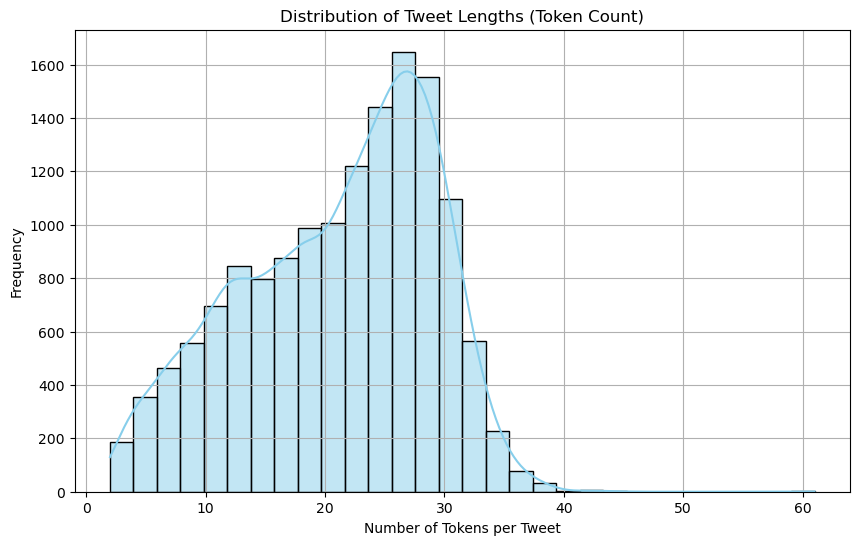

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if data is available
if not df.empty:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['num_tokens'], kde=True, bins=30, color='skyblue')
    plt.title("Distribution of Tweet Lengths (Token Count)")
    plt.xlabel("Number of Tokens per Tweet")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()
else:
    print("⚠️ DataFrame is empty. Cannot plot.")


##  Named Entity Analysis by Sentiment

Named Entities (like names of airlines, cities, or people) provide contextually rich information. In this analysis, we calculate the **average number of named entities** found in tweets for each sentiment category.

###  What We Observe:
- The bar chart shows how many named entities are typically mentioned in **positive**, **neutral**, or **negative** tweets.
- This helps determine whether people are more likely to mention specific entities (e.g., airline names) when expressing a certain type of sentiment.

Understanding this relationship can help in **feature selection** and improving model interpretability.


C:\Users\LG\AppData\Local\Temp\ipykernel_5668\613900156.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='airline_sentiment', y='num_entities', data=sentiment_entity_avg, palette='pastel')


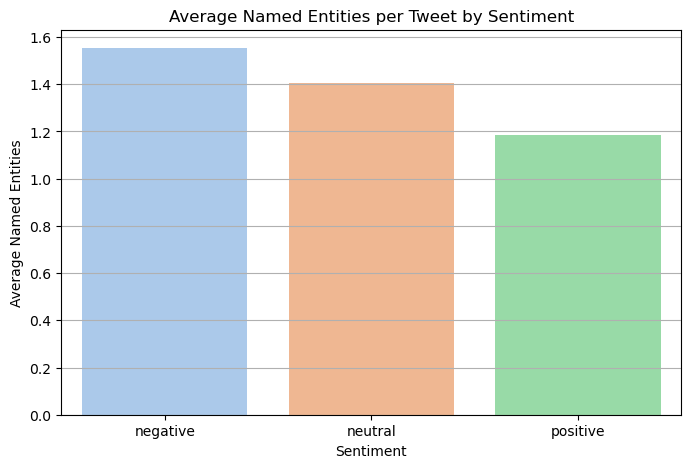

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

if not df.empty:
    # Calculate average number of named entities per sentiment
    sentiment_entity_avg = df.groupby('airline_sentiment')['num_entities'].mean().reset_index()

    # Plot bar chart
    plt.figure(figsize=(8, 5))
    sns.barplot(x='airline_sentiment', y='num_entities', data=sentiment_entity_avg, palette='pastel')
    plt.title("Average Named Entities per Tweet by Sentiment")
    plt.xlabel("Sentiment")
    plt.ylabel("Average Named Entities")
    plt.grid(True, axis='y')
    plt.show()
else:
    print("⚠️ DataFrame is empty. Cannot plot.")


##  Noun Density Across Sentiment Categories

**Noun Density** is a linguistic feature that captures how “noun-heavy” a sentence is, calculated as:



C:\Users\LG\AppData\Local\Temp\ipykernel_5668\3305914571.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='airline_sentiment', y='noun_density', data=noun_density_avg, palette='Set2')


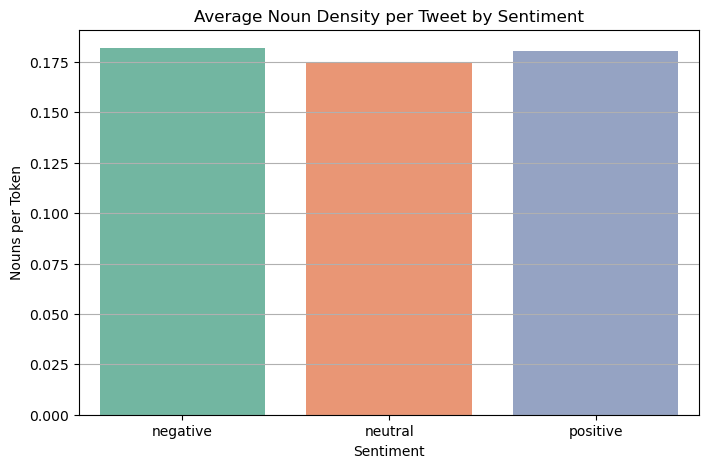

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

if not df.empty:
    # Create a new column: noun density = num_nouns / num_tokens
    df['noun_density'] = df['num_nouns'] / df['num_tokens']

    # Group by sentiment and calculate average noun density
    noun_density_avg = df.groupby('airline_sentiment')['noun_density'].mean().reset_index()

    # Plot bar chart
    plt.figure(figsize=(8, 5))
    sns.barplot(x='airline_sentiment', y='noun_density', data=noun_density_avg, palette='Set2')
    plt.title("Average Noun Density per Tweet by Sentiment")
    plt.xlabel("Sentiment")
    plt.ylabel("Nouns per Token")
    plt.grid(True, axis='y')
    plt.show()
else:
    print("⚠️ DataFrame is empty. Cannot calculate noun density.")


## Named Entity Type Distribution in Tweets

Named Entities are real-world objects like company names, cities, and dates that spaCy can recognize and label. Each recognized entity is assigned a **label** such as:

- `ORG`: Organization (e.g., airlines)
- `GPE`: Geopolitical entity (e.g., cities, countries)
- `PERSON`: Names of people
- `DATE`, `TIME`, `MONEY`, etc.

###  Why This Matters
Analyzing the **distribution of entity types** helps us understand what kinds of topics users tweet about the most in airline-related conversations.

For example:
- A high frequency of `ORG` and `GPE` entities may suggest that users often mention **airlines** and **locations**, especially when expressing **complaints or travel experiences**.

###  What the Chart Shows
This bar chart visualizes how many times each entity type appeared in the dataset. It helps identify the dominant entity categories, which can later inform feature selection or domain-specific tuning.


C:\Users\LG\anaconda3\Lib\site-packages\spacy\pipeline\lemmatizer.py:188: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


<Figure size 1000x500 with 0 Axes>

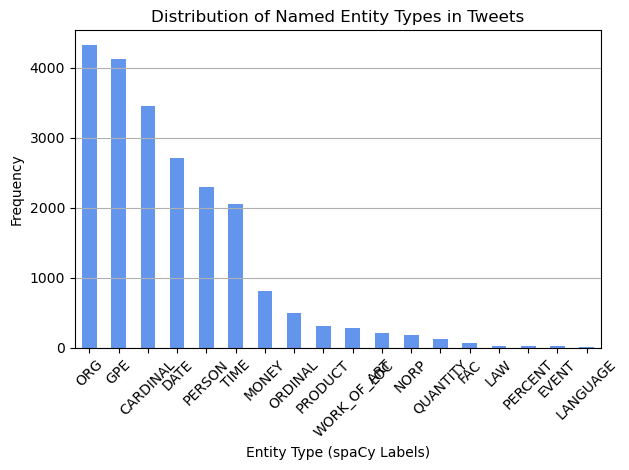

In [12]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

all_entity_labels = []

# MUCH FASTER: Use nlp.pipe() instead of looping with nlp(tweet)
for doc in nlp.pipe(df['text'].astype(str), batch_size=50, disable=["tagger", "parser"]):
    all_entity_labels.extend([ent.label_ for ent in doc.ents])

# Count each entity type
entity_counts = Counter(all_entity_labels)

# Convert to DataFrame
entity_df = pd.DataFrame.from_dict(entity_counts, orient='index', columns=['count'])
entity_df = entity_df.sort_values('count', ascending=False)

# Plot if we have data
if not entity_df.empty:
    plt.figure(figsize=(10, 5))
    entity_df.plot(kind='bar', legend=False, color='cornflowerblue')
    plt.title("Distribution of Named Entity Types in Tweets")
    plt.ylabel("Frequency")
    plt.xlabel("Entity Type (spaCy Labels)")
    plt.grid(True, axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No named entities found to plot.")


## Sentiment Polarity Analysis using TextBlob

TextBlob is a simple Python library for processing textual data. It provides a `.sentiment` property that returns:

- **Polarity**: Ranges from -1 (very negative) to 1 (very positive)
- **Subjectivity**: (not used here) indicates personal opinion vs factual information

###  What We Did:
- We calculated the **polarity score** for each tweet using TextBlob.
- We plotted a histogram to show how these polarity scores are distributed.

###  Interpretation:
- Peaks around **-1** indicate many **negative** tweets
- Peaks near **1** indicate many **positive** tweets
- A balanced distribution indicates a mix of sentiments in the dataset

This polarity score can later be used as a numerical feature in a machine learning model for sentiment classification.


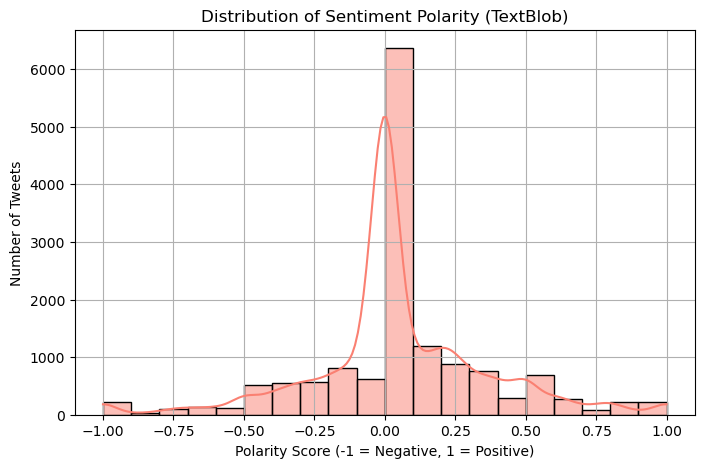

In [13]:
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

# Compute polarity scores using TextBlob
df['textblob_polarity'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Plot sentiment polarity distribution
if not df['textblob_polarity'].empty:
    plt.figure(figsize=(8, 5))
    sns.histplot(df['textblob_polarity'], bins=20, kde=True, color='salmon')
    plt.title("Distribution of Sentiment Polarity (TextBlob)")
    plt.xlabel("Polarity Score (-1 = Negative, 1 = Positive)")
    plt.ylabel("Number of Tweets")
    plt.grid(True)
    plt.show()
else:
    print("⚠️ Polarity data not available.")


In [14]:
# Display selected features for each tweet
df[['text', 
    'char_count', 
    'word_count', 
    'num_tokens', 
    'num_sentences', 
    'num_entities', 
    'num_nouns', 
    'noun_density', 
    'textblob_polarity']].head()


,text,char_count,word_count,num_tokens,num_sentences,num_entities,num_nouns,noun_density,textblob_polarity
0,@VirginAmerica What @dhepburn said.,35.0,4.0,5.0,1.0,0.0,0.0,0.000000,0.000000
1,@VirginAmerica plus you've added commercials t...,72.0,9.0,12.0,1.0,0.0,2.0,0.166667,0.000000
2,@VirginAmerica I didn't today... Must mean I n...,71.0,12.0,15.0,2.0,1.0,2.0,0.133333,-0.390625
3,@VirginAmerica it's really aggressive to blast...,126.0,17.0,23.0,1.0,0.0,4.0,0.173913,0.006250
4,@VirginAmerica and it's a really big bad thing...,55.0,10.0,11.0,1.0,0.0,1.0,0.090909,-0.350000


In [15]:
!pip install scikit-learn

##  Top 20 TF-IDF Terms in Tweets

TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that reflects how important a word is to a document in a collection.

###  What We Did:
- We used `TfidfVectorizer` from `scikit-learn` to extract the **top 20 most important words** from the tweets.
- Words that are common across all tweets get **lower scores**, while unique, meaningful words get **higher scores**.

###  What the Chart Shows:
- The bar chart shows the top 20 words with the **highest cumulative TF-IDF scores** across all tweets.
- These terms are likely **informative keywords** that distinguish different sentiments or contexts.

TF-IDF vectors are often used as input features for machine learning models like Naive Bayes or Logistic Regression when classifying sentiment.


C:\Users\LG\AppData\Local\Temp\ipykernel_5668\2682188375.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tfidf_sums.index, y=tfidf_sums.values, palette='mako')


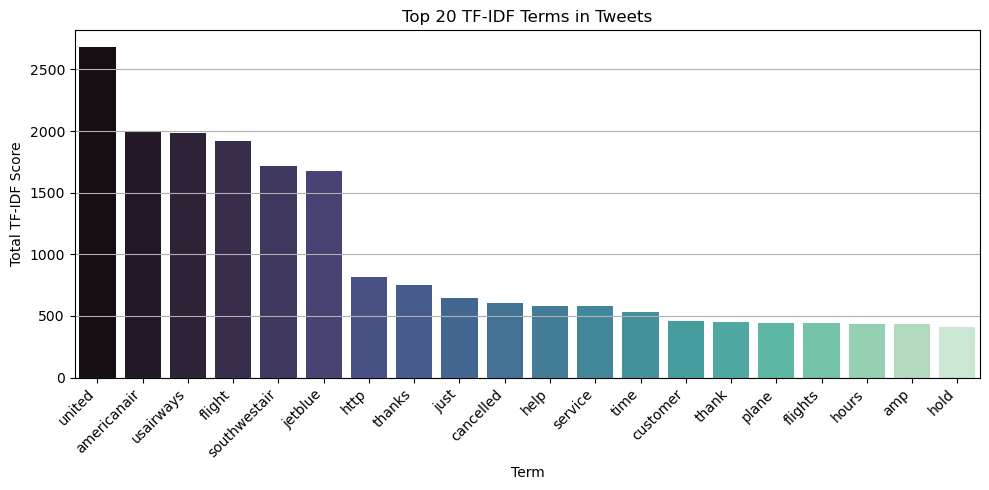

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Initialize TF-IDF Vectorizer (limit to top 20 terms)
vectorizer = TfidfVectorizer(stop_words='english', max_features=20)

# Apply TF-IDF on tweet text
X = vectorizer.fit_transform(df['text'])

# Create DataFrame from TF-IDF results
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Calculate sum of TF-IDF scores for each term
tfidf_sums = tfidf_df.sum().sort_values(ascending=False)

# Plot top 20 TF-IDF terms
plt.figure(figsize=(10, 5))
sns.barplot(x=tfidf_sums.index, y=tfidf_sums.values, palette='mako')
plt.title("Top 20 TF-IDF Terms in Tweets")
plt.ylabel("Total TF-IDF Score")
plt.xlabel("Term")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [17]:
# Correlation of features with sentiment polarity
correlation = df[['char_count', 'word_count', 'num_nouns', 'noun_density', 'textblob_polarity']].corr()
correlation['textblob_polarity'].sort_values(ascending=False)


textblob_polarity    1.000000
noun_density        -0.042899
word_count          -0.082004
num_nouns           -0.090050
char_count          -0.090542
Name: textblob_polarity, dtype: float64